In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
import re

In [3]:
path_img = Path("dataset_classification")
bs = 32
tfms = get_transforms(do_flip=True)
img_size = 224
resize_mode = 'zeros'

In [85]:
data = (ImageList.from_folder(path_img, recurse=True)
                       .split_by_rand_pct(.5)
                       .label_from_folder()
                       .transform(tfms, size=img_size, resize_method=ResizeMethod.PAD, padding_mode='zeros')
                       .databunch(bs=bs)
                       .normalize(imagenet_stats))

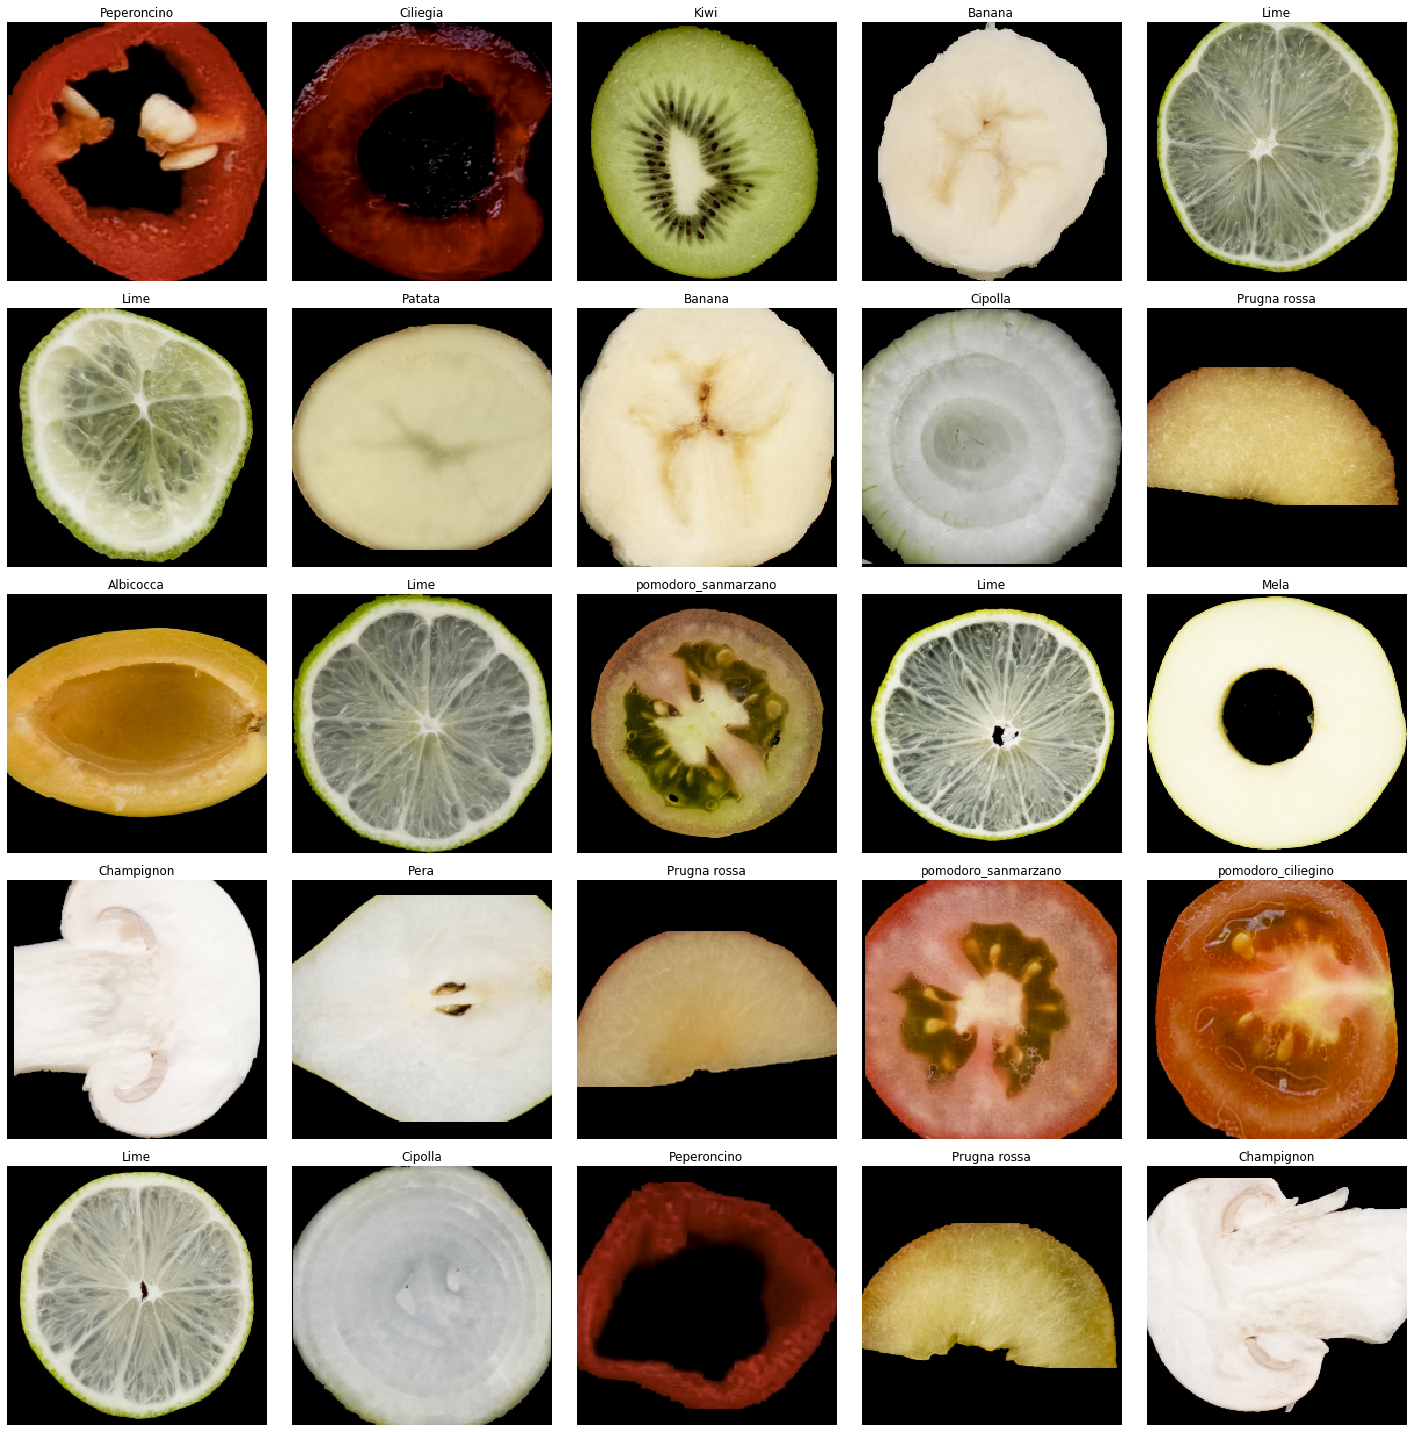

In [70]:
data.show_batch()

In [87]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


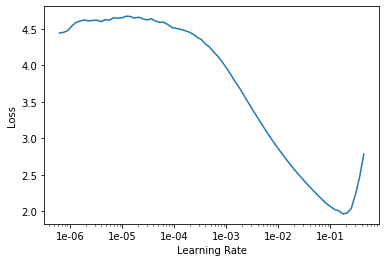

In [72]:
learn.lr_find()
learn.recorder.plot()

In [88]:
learn.fit_one_cycle(3, 1e-2)

In [92]:
learn.fit_one_cycle(1, 1e-3)

In [93]:
learn.fit_one_cycle(1, 1e-3)

In [96]:
learn.fit_one_cycle(1, 1e-3)

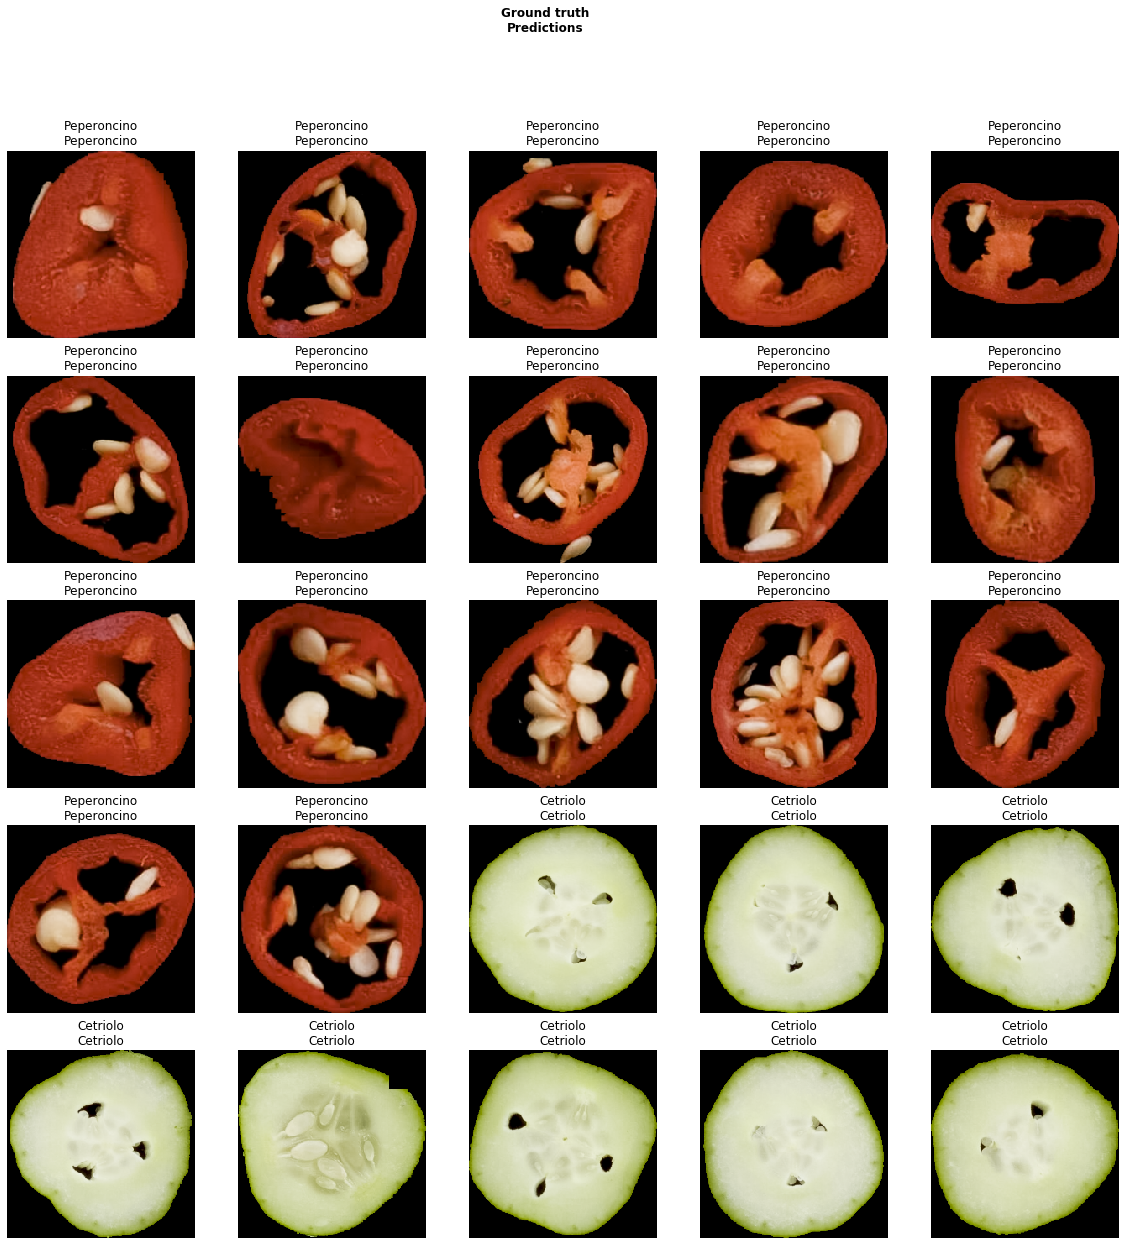

In [78]:
learn.show_results()

In [94]:
intrp = learn.interpret()

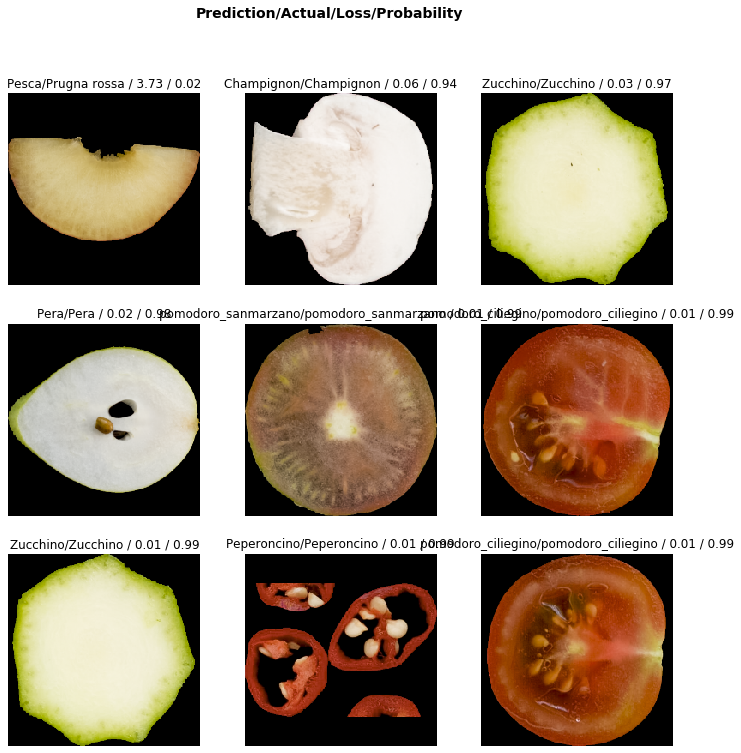

In [95]:
intrp.plot_top_losses(9)

In [116]:
learn.export("models/Classification_resnet18_13_apr_2020.pkl")

In [110]:
learn.predict(intrp.ds[574][0])

(Category Pesca,
 tensor(13),
 tensor([2.7583e-04, 1.2023e-06, 1.6242e-08, 7.8532e-07, 3.1517e-06, 1.9068e-07,
         1.8865e-08, 2.7060e-05, 4.6224e-06, 1.7350e-08, 1.4811e-05, 2.1606e-07,
         5.2569e-07, 9.5051e-01, 4.9149e-02, 6.5276e-06, 7.4108e-06, 2.1965e-07]))

In [111]:
learn.predict(intrp.ds[200][0])

(Category Mela,
 tensor(9),
 tensor([2.1632e-10, 1.2591e-11, 3.8422e-10, 3.1831e-10, 4.8039e-10, 2.0802e-09,
         1.3500e-08, 1.0260e-09, 3.9048e-10, 1.0000e+00, 4.3177e-10, 1.4248e-11,
         3.7276e-08, 1.6806e-07, 1.0019e-10, 5.0628e-11, 1.4112e-09, 1.2540e-11]))

In [4]:
data = (ImageList.from_folder(path_img, recurse=True)
                       .split_by_rand_pct()
                       .label_from_folder()
                       .transform(tfms, size=img_size, resize_method=ResizeMethod.PAD, padding_mode='zeros')
                       .databunch(bs=bs)
                       .normalize(imagenet_stats))

In [5]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [8]:
learn.fit_one_cycle(3, 1e-2)

## Training from scratch without imagenet

In [97]:
data_scratch = (ImageList.from_folder(path_img, recurse=True)
                       .split_by_rand_pct()
                       .label_from_folder()
                       .transform(tfms, size=img_size, resize_method=ResizeMethod.PAD, padding_mode='zeros')
                       .databunch(bs=bs)
                       .normalize(imagenet_stats))

In [101]:
learn_s = cnn_learner(data_scratch, models.resnet18, pretrained=False, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


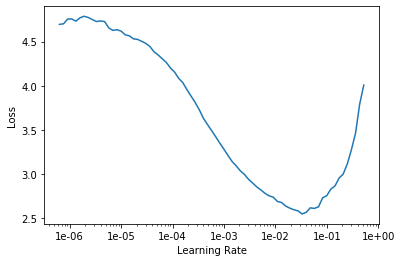

In [100]:
learn_scratch.lr_find()
learn_scratch.recorder.plot()

In [102]:
learn_s.fit_one_cycle(5, 5e-3)

In [103]:
learn_s.fit_one_cycle(5, 1e-3)

In [106]:
data_scratch

ImageDataBunch;

Train: LabelList (1154 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Peperoncino,Peperoncino,Peperoncino,Peperoncino,Peperoncino
Path: dataset_classification;

Valid: LabelList (288 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Patata,Kiwi,pomodoro_ciliegino,Ciliegia,Patata
Path: dataset_classification;

Test: None

In [104]:
intrp_s = learn_s.interpret()

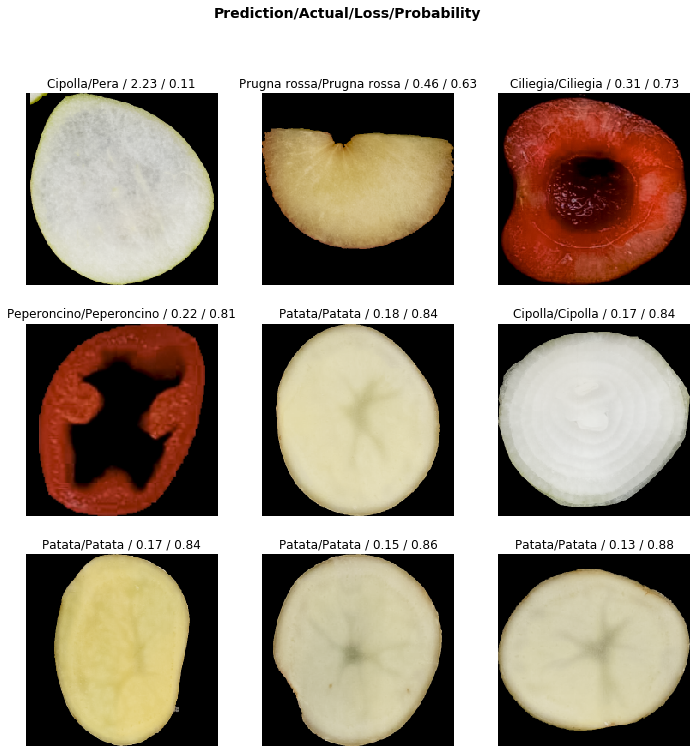

In [105]:
intrp_s.plot_top_losses(9)

# Test different random splits

In [67]:
datas = [(ImageList.from_folder(path_img, recurse=True)
                       .split_by_rand_pct(split)
                       .label_from_folder()
                       .transform(tfms, size=img_size, resize_method=ResizeMethod.PAD, padding_mode='zeros')
                       .databunch(bs=bs)
                       .normalize(imagenet_stats)) for split in list(np.arange(.2, 1, .1)) * 4]

In [68]:
def test_traing(data, epochs=5, lr=1e-2):
    learn = cnn_learner(data, models.resnet18, metrics=error_rate)
    print("%split: ", len(data.valid_ds) /(len(data.valid_ds)+ len(data.train_ds)))
    learn.fit_one_cycle(epochs, lr)
    metrics = np.array(learn.recorder.metrics)
    learn.destroy()
    return metrics

In [69]:
results = [test_traing(data, lr=5e-3) for data in datas]

%split:  0.19972260748959778


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.29958391123439665


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.39944521497919555


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5998613037447988


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.6997226074895978


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.7995839112343966


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.8994452149791956


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.19972260748959778


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.29958391123439665


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.39944521497919555


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5998613037447988


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.6997226074895978


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.7995839112343966


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.8994452149791956


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.19972260748959778


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.29958391123439665


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.39944521497919555


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5998613037447988


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.6997226074895978


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.7995839112343966


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.8994452149791956


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.19972260748959778


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.29958391123439665


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.39944521497919555


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.5998613037447988


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.6997226074895978


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.7995839112343966


this Learner object self-destroyed - it still exists, but no longer usable
%split:  0.8994452149791956


this Learner object self-destroyed - it still exists, but no longer usable


In [74]:
results = pd.DataFrame(np.concatenate([np.tile(np.arange(.2, 1, .1), 4).reshape((-1, 1)),np.array(results).squeeze()], axis=1))

In [82]:
results.sort_values(1)

1         2         3         4         5         6
0   0.2  0.000000  0.000000  0.000000  0.000000  0.000000
24  0.2  0.006944  0.003472  0.000000  0.003472  0.000000
8   0.2  0.010417  0.010417  0.000000  0.006944  0.000000
16  0.2  0.013889  0.000000  0.000000  0.000000  0.000000
1   0.3  0.009259  0.002315  0.002315  0.002315  0.002315
25  0.3  0.002315  0.000000  0.000000  0.000000  0.000000
17  0.3  0.009259  0.004630  0.004630  0.004630  0.002315
9   0.3  0.004630  0.002315  0.002315  0.000000  0.000000
2   0.4  0.003472  0.000000  0.000000  0.000000  0.000000
18  0.4  0.005208  0.006944  0.000000  0.001736  0.000000
10  0.4  0.010417  0.001736  0.003472  0.005208  0.005208
26  0.4  0.013889  0.001736  0.001736  0.001736  0.001736
19  0.5  0.011096  0.000000  0.001387  0.000000  0.000000
27  0.5  0.008322  0.005548  0.002774  0.001387  0.000000
11  0.5  0.004161  0.002774  0.002774  0.002774  0.001387
3   0.5  0.015257  0.006935  0.002774  0.002774  0.004161
20  0.6  0.013873  0.002312  0.000000  0.002312  0.002312
28  0.6  0.016185  0.004624  0.000000  0.000000  0.000000
4   0.6  0.020809  0.002312  0.000000  0.000000  0.000000
12  0.6  0.016185  0.005780  0.002312  0.001156  0.001156
29  0.7  0.016848  0.002973  0.001982  0.001982  0.001982
5   0.7  0.013875  0.001982  0.000991  0.000991  0.000991
21  0.7  0.035679  0.006938  0.006938  0.004955  0.003964
13  0.7  0.029732  0.008920  0.005946  0.004955  0.004955
14  0.8  0.124892  0.013010  0.011275  0.008673  0.007806
30  0.8  0.087598  0.013877  0.007806  0.006071  0.006071
6   0.8  0.092801  0.007806  0.004337  0.000000  0.000000
22  0.8  0.059844  0.009540  0.012142  0.007806  0.008673
15  0.9  0.711642  0.111796  0.065536  0.051658  0.047032
7   0.9  0.707016  0.120278  0.030069  0.014649  0.007710
23  0.9  0.711642  0.101002  0.038550  0.019275  0.014649
31  0.9  0.636083  0.052429  0.020817  0.019275  0.014649

In [44]:
np.array(results).shape

(16, 5, 1)

In [45]:
np.arange(.2, 1, .1)[None].shape

(1, 8)

In [21]:
list(range(2, 9, 1))

[2, 3, 4, 5, 6, 7, 8]

In [24]:
len(data.valid_ds)

288